## Business Problem
**The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.
Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.**

In [213]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [214]:
# loading the dataset

df = pd.read_csv("aerofit_treadmill.csv")

In [215]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [216]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [217]:
# checking the data structure of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [218]:
print("No. of Rows = ", df.shape[0])

No. of Rows =  180


In [219]:
print("No. of Columns = ", df.shape[1])

No. of Columns =  9


In [220]:
# checking for missing or null values

df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**The given data does not have any missing values.**

In [221]:
# checking for duplicated values.

df[df.duplicated()]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


**No duplicate values are found in the dataset.**

In [222]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


* **There are 3 unique products in the given data.**
* **KP281 is the top product.**
* **The dataset mostly has records for male customers.**
* **Married/Partnered people have actively participated in the survey.**
* **18 to 50 age groups of people participated in this survey.**
* **Mean age is 28.78 years and 75% of people have age less than or equal to 33 years.**
* **There is a huge difference between <font color='red'>75% percentile</font> value and <font color='red'>max</font> value for <font color='blue'>Income</font> and <font color='blue'>Miles</font> columns. So there might be outliers present in these two columns.** 

### NON VISUAL ANALYSIS

##### VALUE COUNTS & UNIQUE VALUES

In [223]:

df["Product"].nunique()

3

In [224]:

df["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [225]:
df["Age"].nunique()

32

In [226]:
df["Age"].value_counts()

25    25
23    18
26    12
24    12
28     9
33     8
35     8
30     7
38     7
22     7
21     7
27     7
34     6
31     6
29     6
40     5
20     5
32     4
19     4
37     2
45     2
48     2
47     2
50     1
36     1
39     1
41     1
42     1
43     1
44     1
46     1
18     1
Name: Age, dtype: int64

In [227]:
df["Gender"].nunique()

2

In [228]:
df["Gender"].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [229]:
df["Education"].nunique()

8

In [230]:
df["Education"].value_counts()

16    85
14    55
18    23
15     5
13     5
21     3
12     3
20     1
Name: Education, dtype: int64

In [231]:
df["MaritalStatus"].nunique()

2

In [232]:
df["MaritalStatus"].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [233]:
df["Usage"].nunique()

6

In [234]:
df["Usage"].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [235]:
df["Fitness"].nunique()

5

In [236]:
df["Fitness"].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [237]:
df["Income"].nunique()

62

In [238]:
df["Income"].value_counts()

45480    14
52302     9
53439     8
54576     8
46617     8
         ..
58516     1
85906     1
29562     1
68220     1
54781     1
Name: Income, Length: 62, dtype: int64

In [239]:
df["Miles"].nunique()

37

In [240]:
df["Miles"].value_counts()

85     27
95     12
66     10
75     10
47      9
106     9
113     8
94      8
53      7
100     7
56      6
64      6
180     6
200     6
127     5
160     5
42      4
150     4
120     3
38      3
170     3
74      3
103     3
132     2
141     2
300     1
280     1
21      1
240     1
80      1
212     1
360     1
112     1
140     1
169     1
188     1
260     1
Name: Miles, dtype: int64

### VISUAL ANALYSIS

#### UNIVARIATE & BIVARIATE ANALYSIS

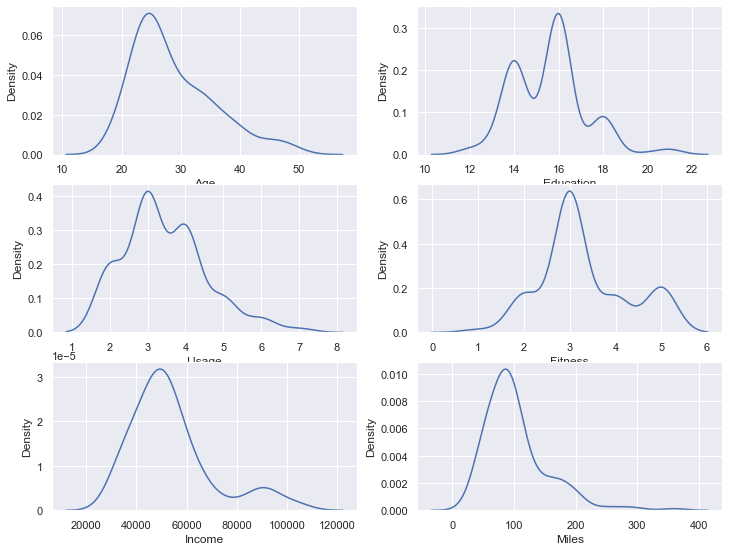

In [241]:
# kde plots for different numerical colums to detect outliers.

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig.subplots_adjust(top=1.0)
sns.kdeplot(x=df.Age, ax=axis[0,0])
sns.kdeplot(x=df.Education, ax=axis[0,1])
sns.kdeplot(x=df.Usage, ax=axis[1,0])
sns.kdeplot(x=df.Fitness, ax=axis[1,1])
sns.kdeplot(x=df.Income, ax=axis[2,0])
sns.kdeplot(x=df.Miles, ax=axis[2,1])
plt.show()

* **AS we can see in the above graphs that <font color='blue'>Income</font> and <font color='blue'>Miles</font> graph is more skewed as compared to other graphs. So there is a high chance that these two columns will have more number of outliers.**

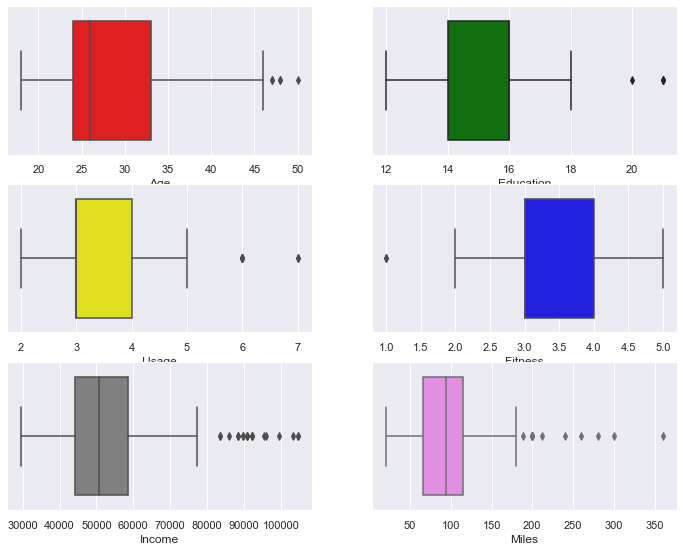

In [242]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig.subplots_adjust(top=1.0)
sns.boxplot(x=df.Age, orient='h', ax=axis[0,0], color="red")
sns.boxplot(x=df.Education, orient='h', ax=axis[0,1], color="green")
sns.boxplot(x=df.Usage, orient='h', ax=axis[1,0], color="yellow")
sns.boxplot(x=df.Fitness, orient='h', ax=axis[1,1], color="blue")
sns.boxplot(x=df.Income, orient='h', ax=axis[2,0], color="grey")
sns.boxplot(x=df.Miles, orient='h', ax=axis[2,1], color="violet")
plt.show()

* **Boxplot made it quite clear that even all the columns have outliers but the <font color='blue'>Income</font> and <font color='blue'>Miles</font> columns have more number of outliers.**

#### OUTLIERS HANDLING

In [243]:
# creating a new copy of dataframe to handle the outliers.

df1=df.copy()

In [244]:
df1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [245]:
# age column outlier handling calculating the 5 percentile and 95 percentile.

age_05 = df1["Age"].quantile(0.05)
age_95 = df1["Age"].quantile(0.95)

In [246]:
# using np.clip clipping the outliers between the 5 percentile and 95 percentile.

df1['Age'].clip(age_05, age_95, inplace=True)

In [247]:
df1["Age"]

0      20.00
1      20.00
2      20.00
3      20.00
4      20.00
       ...  
175    40.00
176    42.00
177    43.05
178    43.05
179    43.05
Name: Age, Length: 180, dtype: float64

In [248]:
df1["Age"].value_counts()

25.00    25
23.00    18
24.00    12
26.00    12
20.00    10
28.00     9
43.05     9
35.00     8
33.00     8
38.00     7
21.00     7
30.00     7
22.00     7
27.00     7
34.00     6
31.00     6
29.00     6
40.00     5
32.00     4
37.00     2
39.00     1
41.00     1
43.00     1
36.00     1
42.00     1
Name: Age, dtype: int64

In [249]:
education_05 = df1["Education"].quantile(0.05)
education_95 = df1["Education"].quantile(0.95)
df1['Education'].clip(education_05, education_95, inplace=True)

In [250]:
usage_05 = df1["Usage"].quantile(0.05)
usage_95 = df1["Usage"].quantile(0.95)
df1['Usage'].clip(usage_05, usage_95, inplace=True)

In [251]:
fitness_05 = df1["Fitness"].quantile(0.05)
fitness_95 = df1["Fitness"].quantile(0.95)
df1['Fitness'].clip(fitness_05, fitness_95, inplace=True)

In [252]:
income_11 = df1["Income"].quantile(0.11)
income_89 = df1["Income"].quantile(0.89)
df1['Income'].clip(income_11, income_89, inplace=True)

In [253]:
miles_10 = df1["Miles"].quantile(0.10)
miles_90 = df1["Miles"].quantile(0.90)
df1['Miles'].clip(miles_10, miles_90, inplace=True)

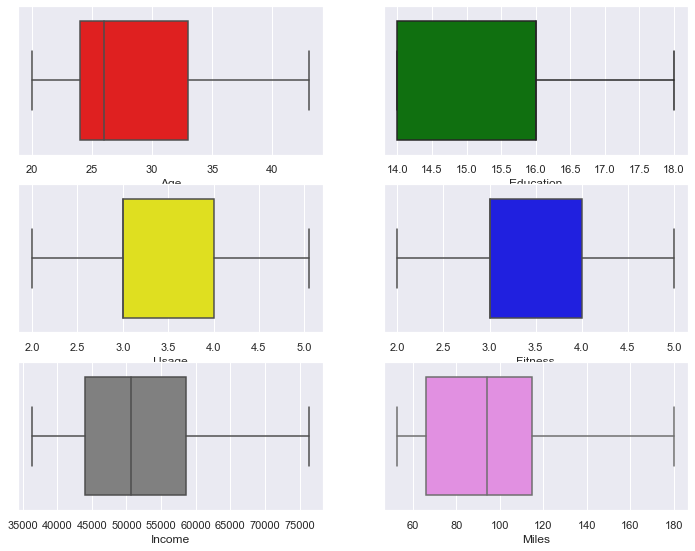

In [254]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig.subplots_adjust(top=1.0)
sns.boxplot(x=df1.Age, orient='h', ax=axis[0,0], color="red")
sns.boxplot(x=df1.Education, orient='h', ax=axis[0,1], color="green")
sns.boxplot(x=df1.Usage, orient='h', ax=axis[1,0], color="yellow")
sns.boxplot(x=df1.Fitness, orient='h', ax=axis[1,1], color="blue")
sns.boxplot(x=df1.Income, orient='h', ax=axis[2,0], color="grey")
sns.boxplot(x=df1.Miles, orient='h', ax=axis[2,1], color="violet")
plt.show()

* **Now we can see in the above boxplots that there are no outliers present in the data after outliers handling.**

In [255]:
df1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.0,Male,14,Single,3.0,4,36384.0,112
1,KP281,20.0,Male,15,Single,2.0,3,36384.0,75
2,KP281,20.0,Female,14,Partnered,4.0,3,36384.0,66
3,KP281,20.0,Male,14,Single,3.0,3,36384.0,85
4,KP281,20.0,Male,14,Partnered,4.0,2,36384.0,53


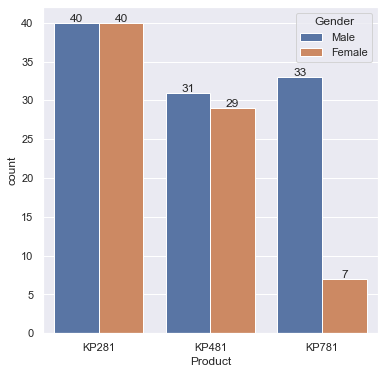

In [256]:
fig, ax = plt.subplots(figsize=(6, 6))
c = sns.countplot(x="Product", hue="Gender", data=df1)
for p in c.patches:
    height = p.get_height()
    c.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
plt.show()

* **The above countplot shows that KP281 is used by equal no of male and female, KP481 is used by male a little bit more than female while the KP781 is mostly used by male and very few feamle use this product.**

In [257]:
# Average Age of customer using each product
round(df1.groupby('Product')['Age'].mean())

Product
KP281    28.0
KP481    29.0
KP781    29.0
Name: Age, dtype: float64

* Mean age of people using KP281 product is 28 years.
* Mean age of people using KP481 product is 29 years.
* Mean age of people using KP781 product is 29 years.

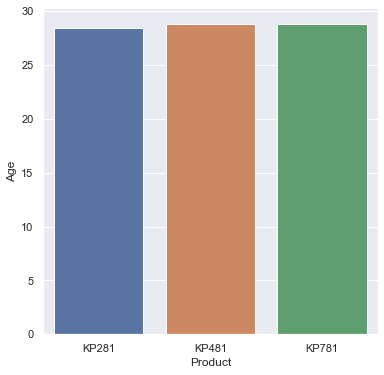

In [258]:
fig, ax = plt.subplots(figsize=(6, 6))
b = sns.barplot(x="Product", y="Age", data=df1, ci=None)
plt.show()

* **KP481 & KP781 product is used by same age group while the age of customers using KP281 product is little less.**

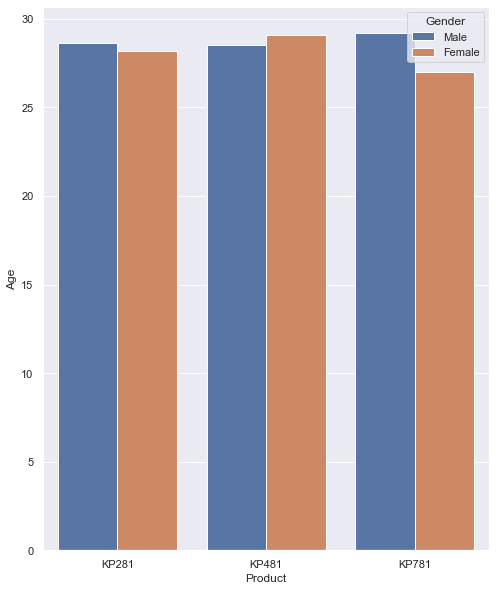

In [259]:
fig, ax = plt.subplots(figsize=(8, 10))
b = sns.barplot(x="Product", y="Age", data=df1, ci=None, hue="Gender")
plt.show()

* **KP481 product is used more by the higher aged women as compared to men.**

In [260]:
df1['Age_Group'] = df1.Age
df1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Group
0,KP281,20.0,Male,14,Single,3.0,4,36384.0,112,20.0
1,KP281,20.0,Male,15,Single,2.0,3,36384.0,75,20.0
2,KP281,20.0,Female,14,Partnered,4.0,3,36384.0,66,20.0
3,KP281,20.0,Male,14,Single,3.0,3,36384.0,85,20.0
4,KP281,20.0,Male,14,Partnered,4.0,2,36384.0,53,20.0


In [261]:
df1["Age"].value_counts()

25.00    25
23.00    18
24.00    12
26.00    12
20.00    10
28.00     9
43.05     9
35.00     8
33.00     8
38.00     7
21.00     7
30.00     7
22.00     7
27.00     7
34.00     6
31.00     6
29.00     6
40.00     5
32.00     4
37.00     2
39.00     1
41.00     1
43.00     1
36.00     1
42.00     1
Name: Age, dtype: int64

In [262]:
# 0-21 -> Teen
# 22-30 -> Adult
# 31-40 -> Middle Age
# 41-43.05 -> Elder Age
df1.Age_Group = pd.cut(df1.Age_Group,bins=[0,21,30,40,43.05],labels=['Teen','Adult','Middle Aged','Elder'])

In [263]:
df1["Age_Group"].value_counts()

Adult          103
Middle Aged     48
Teen            17
Elder           12
Name: Age_Group, dtype: int64

**Adult aged people have more participated in the survey. Adult count is 103.**

In [264]:
df1.loc[df1.Product=='KP281']["Age_Group"].value_counts()

Adult          45
Middle Aged    19
Teen           10
Elder           6
Name: Age_Group, dtype: int64

In [265]:
df1.loc[df1.Product=='KP481']["Age_Group"].value_counts()

Adult          28
Middle Aged    23
Teen            7
Elder           2
Name: Age_Group, dtype: int64

In [266]:
df1.loc[df1.Product=='KP781']["Age_Group"].value_counts()

Adult          30
Middle Aged     6
Elder           4
Teen            0
Name: Age_Group, dtype: int64

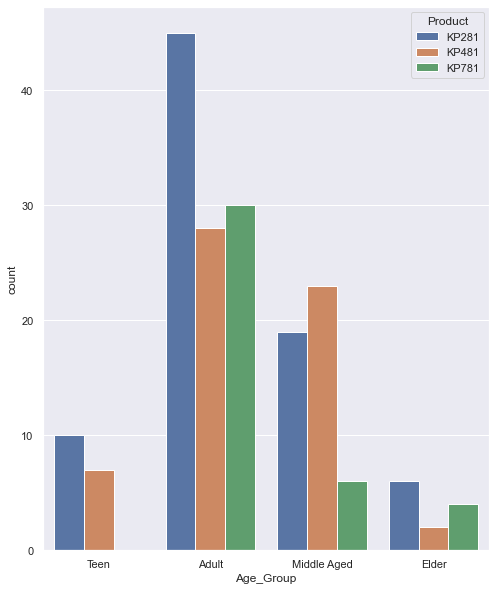

In [267]:
fig, ax = plt.subplots(figsize=(8, 10))
b = sns.countplot(x="Age_Group", data=df1, hue="Product")
plt.show()

* **No teen is using KP781.**
* **Mostly Adult is using KP281.**

In [268]:
pd.crosstab(index=df1.Product,columns=df1.Age_Group,margins=True)

Age_Group,Teen,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,10,45,19,6,80
KP481,7,28,23,2,60
KP781,0,30,6,4,40
All,17,103,48,12,180


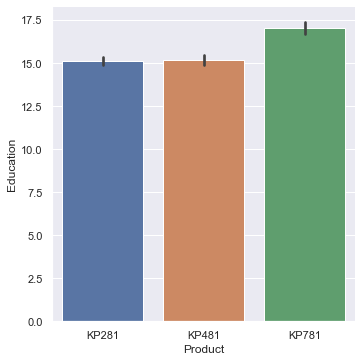

In [269]:
sns.catplot(x='Product',y='Education', data=df1, kind='bar')
plt.show()

* **People who have education of more than 15 years uses KP781 product while KP481 & KP281 is used by people whose education period lies between 0-15 years.**

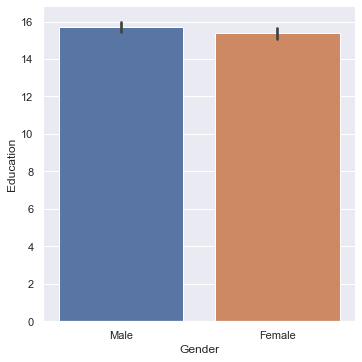

In [270]:
sns.catplot(x='Gender',y='Education', data=df1, kind='bar')
plt.show()

* **Overall Males have higher years of education than Femals.**

In [271]:
# Average Education of customer using each product
df1.groupby('Product')['Education'].mean()

Product
KP281    15.125000
KP481    15.183333
KP781    17.050000
Name: Education, dtype: float64

* Mean of education years of customers using KP281 is 15 years.
* Mean of education years of customers using KP481 is 15 years.
* Mean of education years of customers using KP781 is 17 years.

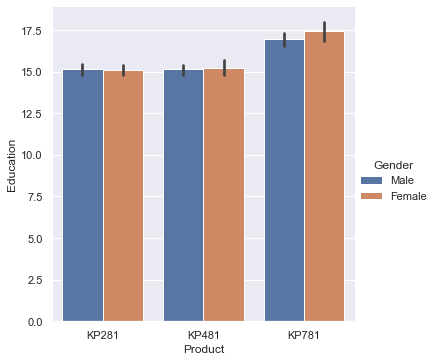

In [272]:
sns.catplot(x='Product',y='Education', data=df1, kind='bar', hue="Gender" )
plt.show()

* **The above graph shows that the customers using KP781 product more number of females are highly educated there.**

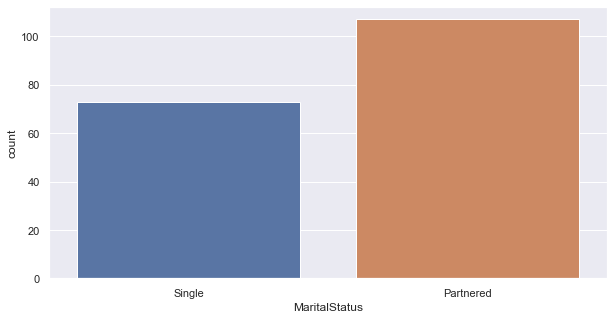

In [273]:
plt.figure(figsize=(10,5))
sns.countplot(x="MaritalStatus", data=df1)
plt.show()

* **More married people participated in the survey.**

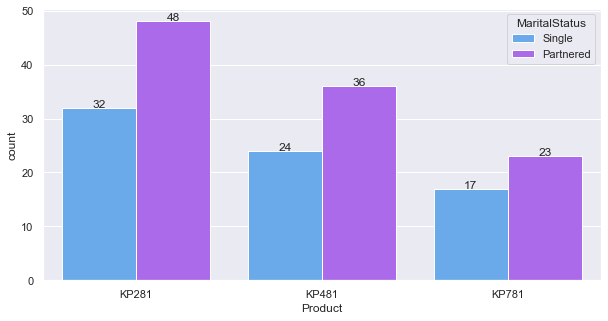

In [274]:
plt.figure(figsize=(10,5))
c=sns.countplot(x="Product", hue="MaritalStatus", data=df1, palette='cool')
for p in c.patches:
    height = p.get_height()
    c.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
plt.show()

* **KP281 is purchased by 48 married couples and 32 single.**
* **KP481 is purchased by 36 married couples and 24 single.**
* **KP781 is purchased by 23 married couples and 17 single.**

In [275]:
# Average usage of each product type by the customer
round(df1.groupby('Product')['Usage'].mean())

Product
KP281    3.0
KP481    3.0
KP781    5.0
Name: Usage, dtype: float64

* Mean usage of KP281 product is 3 times in a week.
* Mean usage of KP481 product is 3 times in a week.
* Mean usage of KP781 product is 5 times in a week.

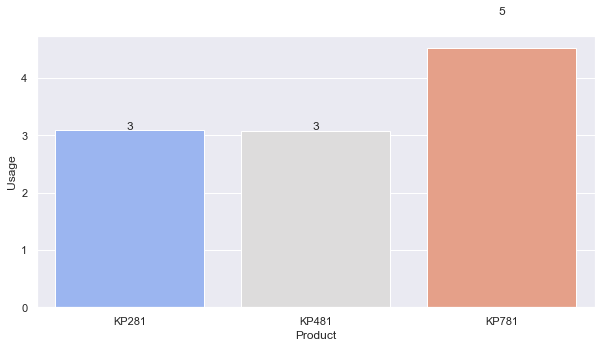

In [276]:
plt.figure(figsize=(10,5))
b=sns.barplot(x="Product", y="Usage", data=df1, palette='coolwarm', ci=None)
for p in b.patches:
    height = round(p.get_height())
    b.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
plt.show()

* **The customers having KP781 does exercise 5 times a week.**
* **The customers having KP281 & KP481 does exercise 3 times a week.**

In [277]:
# creating a new column for fitness of datatype object
df1["Fitness_Category"]=df1["Fitness"]

In [278]:
# assigning values to the new object type fitness column

df1["Fitness_Category"].replace({1:"Poor Shape",
                            2:"Bad Shape",
                            3:"Average Shape",
                            4:"Good Shape",
                            5:"Excellent Shape"},inplace=True)
df1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Group,Fitness_Category
0,KP281,20.0,Male,14,Single,3.0,4,36384.0,112,Teen,Good Shape
1,KP281,20.0,Male,15,Single,2.0,3,36384.0,75,Teen,Average Shape
2,KP281,20.0,Female,14,Partnered,4.0,3,36384.0,66,Teen,Average Shape
3,KP281,20.0,Male,14,Single,3.0,3,36384.0,85,Teen,Average Shape
4,KP281,20.0,Male,14,Partnered,4.0,2,36384.0,53,Teen,Bad Shape


In [279]:
df1["Fitness_Category"].value_counts()

Average Shape      97
Excellent Shape    31
Bad Shape          28
Good Shape         24
Name: Fitness_Category, dtype: int64

In [280]:
# Average customer fitness rating for each product type purchased
round(df1.groupby('Product')['Fitness'].mean())

Product
KP281    3.0
KP481    3.0
KP781    5.0
Name: Fitness, dtype: float64

* Mean ranking of fitness of customers using KP281 is 3.0 - Average Shape.
* Mean ranking of fitness of customers using KP481 is 3.0 - Average Shape.
* Mean ranking of fitness of customers using KP781 is 5.0 - Excellent Shape.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


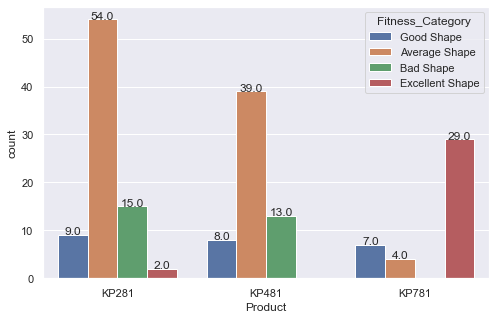

In [281]:
plt.figure(figsize=(8,5))
c=sns.countplot(x="Product", hue="Fitness_Category", data=df1, palette='deep')
for p in c.patches:
    height = p.get_height()
    c.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
plt.show()

* **The above graph shows that the all the <font color='blue'>TRADEMILL</font> products are very usefull for customers as none of the customer is in <font color='blue'>Poor Shape</font> cheers.**
* **The customers using <font color='green'>KP781</font> are more in excellent shape.**
* **The customers using <font color='red'>KP281 & KP481</font> are more in average shape.**

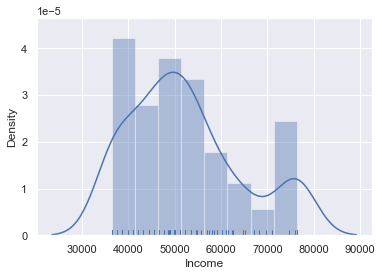

In [282]:
# income Analysis
sns.distplot(df1.Income,rug=True)
plt.show()

* **Average Income of customers lies between 50K to 55K.**
* **Average Income density is over 3.**

In [283]:
# exact average income figure
df1["Income"].mean()

52296.38333333328

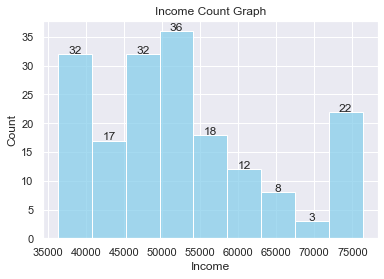

In [284]:
# Income Analysis
h=sns.histplot(data=df1,x='Income', color="skyblue")
plt.title("Income Count Graph")
for p in h.patches:
    height = p.get_height()
    h.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
plt.show()

* **36 customers earn 50K$ annually.**

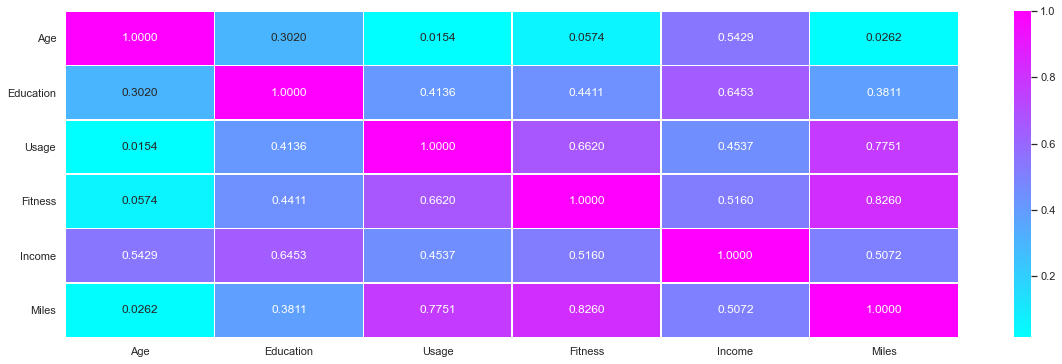

In [285]:
#Correlation HeatMap
plt.figure(figsize=(20,6))
ax = sns.heatmap(df1.corr(),annot=True,fmt='.4f',linewidths=.5,cmap='cool')
plt.yticks(rotation=0)
plt.show()

**OBSERVATIONs**
* Fitness and Miles are highly correlated having value 0.82
* Correlation value between Miles and Usage is 0.77.
* Correlation value between Fitness and Income is 0.51
* Correlation value between Miles and Income is 0.50
* Correlation value between Fitness and Usage is 0.66

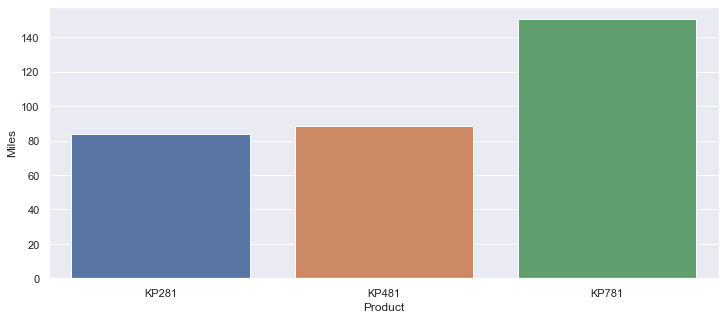

In [286]:
# Miles with each product
plt.figure(figsize=(12,5))
sns.barplot(y='Miles',x='Product',data=df1, ci=None)
plt.show()

**OBSERVATIONs**
* Customers with product KP781, has been able to cover more miles than other two product types.
* KP481 product is the second most highest miles covering product among the customers.
* KP281 product customer had covered less distance compared with other two product types.

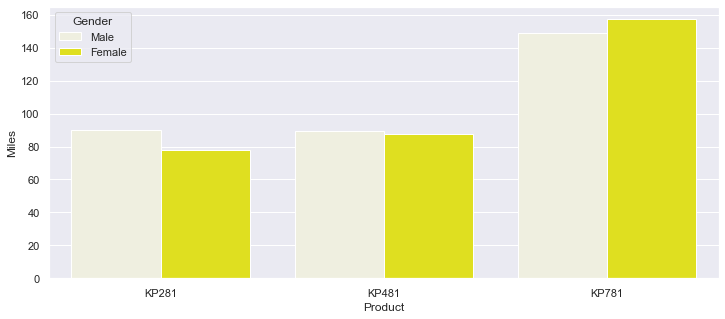

In [287]:
plt.figure(figsize=(12,5))
sns.barplot(y='Miles',x='Product',data=df1, ci=None, hue="Gender", color="yellow")
plt.show()

**OBSERVATIONs**
* For KP781 product female customers have covered more miles.
* For KP281 & KP481 male customers have covered more miles.

<Figure size 864x360 with 0 Axes>

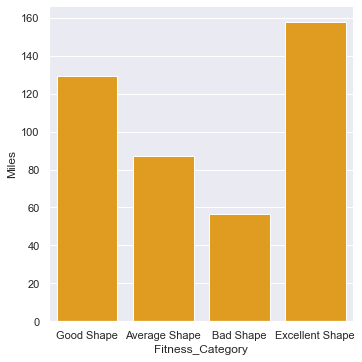

In [288]:
plt.figure(figsize=(12,5))
sns.catplot(y='Miles',x='Fitness_Category',data=df1, ci=None, color="orange", kind="bar")
plt.show()

**OBSERVATIONs**
* People who walk/ran more than 150 miles are in excellent shape.
* People who walk/run between 120 - 130 miles atre in good shape.
* People who walk/run 80-90 miles are in average shape.
* People who walk/run less than 60 miles are in bad shape.

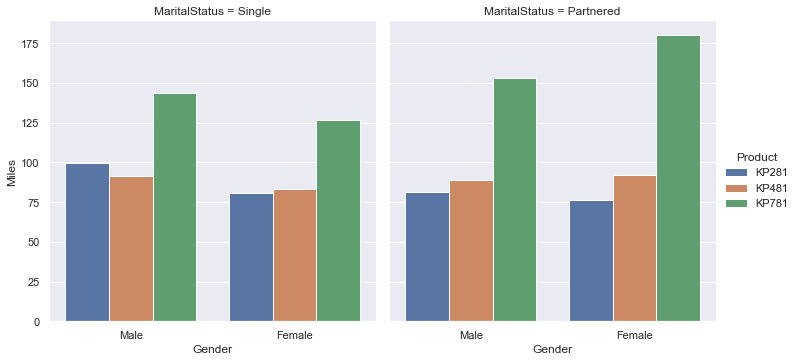

In [289]:
# miles covered in each product by gender and their marital status
sns.catplot(x='Gender',y='Miles',hue='Product',col='MaritalStatus',data=df1,kind='bar', ci=None)
plt.show()

**OBSERVATIONs**
* KP781 is more popular among the single and Partnered customers.
* Among the both marital statuses, Single female does not prefer much of the products.
* Partnered Female bought KP781 treadmill compared to Partnered Male.
* Single Female customers bought KP281 treadmill slightly more compared to Single Male customers.
* Partnered Male customers bought KP281 treadmill slightly more than Single Male customers.
* There are more single Males buying treadmill than single Females.
* Single Male customers bought KP781 treadmill compared to single Female.
* Partnered customers are more than Single customers.

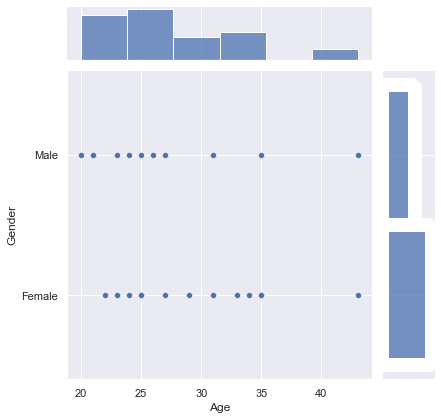

In [290]:
# lets analyze the trend for customer's Gender and Age who rated less than 3 in Fitness rating. 

sns.jointplot(x='Age',y='Gender',data=df1[df1.Fitness<3])
plt.show()

**OBSERVATIONs**

* Above Joint plot describes the relationship between the customer age and their gender grouping.
* Product is not familiar with older or middle age womens.

### Computing Marginal & Conditional Probabilities:

**Marginal Properties**

In [291]:
df1.Product.value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

* Probability of customers buying <font color='blue'>KP281 is 0.44</font>
* Probability of customers buying <font color='blue'>KP481 is 0.33</font>
* Probability of customers buying <font color='blue'>KP781 is 0.22</font>

In [292]:
df1.Gender.value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

* Probability of male customers is <font color='blue'>0.57</font>
* Probability of female customers is <font color='blue'>0.42</font>

In [293]:
df1.MaritalStatus.value_counts(normalize=True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

* Probability of Married/Partnered customers is <font color='blue'>0.59</font>
* Probability of Single customers is <font color='blue'>0.40</font>

In [294]:
df1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Group,Fitness_Category
0,KP281,20.0,Male,14,Single,3.0,4,36384.0,112,Teen,Good Shape
1,KP281,20.0,Male,15,Single,2.0,3,36384.0,75,Teen,Average Shape
2,KP281,20.0,Female,14,Partnered,4.0,3,36384.0,66,Teen,Average Shape
3,KP281,20.0,Male,14,Single,3.0,3,36384.0,85,Teen,Average Shape
4,KP281,20.0,Male,14,Partnered,4.0,2,36384.0,53,Teen,Bad Shape


**Conditional Probabilities P(Product/Gender)**

In [295]:
def gender_product_Probability(gender,df1):
    print(f"Prob P(KP781) for {gender}: {round(df1['KP781'][gender]/df1.loc[gender].sum(),2)}")
    print(f"Prob P(KP481) for {gender}: {round(df1['KP481'][gender]/df1.loc[gender].sum(),2)}")
    print(f"Prob P(KP281) for {gender}: {round(df1['KP281'][gender]/df1.loc[gender].sum(),2)}")
    
df1_temp = pd.crosstab(index=df1['Gender'],columns=[df1['Product']])
print(df1_temp)
print("---------------------------------------------------------------------")

print("Prob of Male: ",round(df1_temp.loc['Male'].sum()/len(df1),2))
print("Prob of Female: ",round(df1_temp.loc['Female'].sum()/len(df1),2))
print()
gender_product_Probability('Male',df1_temp)
print()
gender_product_Probability('Female',df1_temp)


Product  KP281  KP481  KP781
Gender                      
Female      40     29      7
Male        40     31     33
---------------------------------------------------------------------
Prob of Male:  0.58
Prob of Female:  0.42

Prob P(KP781) for Male: 0.32
Prob P(KP481) for Male: 0.3
Prob P(KP281) for Male: 0.38

Prob P(KP781) for Female: 0.09
Prob P(KP481) for Female: 0.38
Prob P(KP281) for Female: 0.53


**Conditional Probabilities P(Product/MaritalStatus)**

In [296]:
def MS_Probability(ms_status,df1):
    print(f"Prob P(KP781) for {ms_status}: {round(df1['KP781'][ms_status]/df1.loc[ms_status].sum(),3)}")
    print(f"Prob P(KP481) for {ms_status}: {round(df1['KP481'][ms_status]/df1.loc[ms_status].sum(),3)}")
    print(f"Prob P(KP281) for {ms_status}: {round(df1['KP281'][ms_status]/df1.loc[ms_status].sum(),3)}")
    
df1_temp = pd.crosstab(index=df1['MaritalStatus'],columns=[df1['Product']])
print(df1_temp)
print("---------------------------------------------------------------------------------")
print("Prob of P(Single): ",round(df1_temp.loc['Single'].sum()/len(df1),3))
print("Prob of P(Married/Partnered): ",round(df1_temp.loc['Partnered'].sum()/len(df1),3))
print()
MS_Probability('Single',df1_temp)
print()
MS_Probability('Partnered',df1_temp)

Product        KP281  KP481  KP781
MaritalStatus                     
Partnered         48     36     23
Single            32     24     17
---------------------------------------------------------------------------------
Prob of P(Single):  0.406
Prob of P(Married/Partnered):  0.594

Prob P(KP781) for Single: 0.233
Prob P(KP481) for Single: 0.329
Prob P(KP281) for Single: 0.438

Prob P(KP781) for Partnered: 0.215
Prob P(KP481) for Partnered: 0.336
Prob P(KP281) for Partnered: 0.449


In [297]:
np.round(((pd.crosstab(df1.Product,df1.Gender,margins=True))/180)*100,2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


**Marginal Probability**

* Probability of Male Customer Purchasing any product is : <font color='blue'>57.78%</font>

* Probability of Female Customer Purchasing any product is : <font color='blue'>42.22%</font>

**Marginal Probability of any customer buying products**

* Probability for product KP281 is : <font color='blue'>44.44%</font> (cheapest / entry level product)

* Probability for product KP481 is : <font color='blue'>33.33%</font> (intermediate user level product)

* Probability for product KP781 is : <font color='blue'>22.22%</font> (Advanced product)

In [298]:
np.round((pd.crosstab([df1.Product],df1.Gender,margins=True,normalize="columns"))*100,2)

Gender,Female,Male,All
Product,,,
KP281,52.63,38.46,44.44
KP481,38.16,29.81,33.33
KP781,9.21,31.73,22.22


**Conditional Probabilities**

* Probability of Female customer buying KP281 is <font color='blue'>52.63%</font> which is more than Male <font color='blue'>38.46%</font>.

* KP281 is more recommended for female customers.

* Probability of Male customer buying Product KP781 is <font color='blue'>31.73%</font> which is way more than female <font color='blue'>9.21%</font>.

* Probability of Female customer buying Product KP481 is <font color='blue'>38.15%</font> which is significantly higher than male <font color='blue'>29.08%</font>.

* KP481 product is specifically recommended for Female customers who exercise at intermediate level.

#### KEY TAKEWAYS

**Customer's Profile on the basis of Products**

#### KP281

* KP281 is the entry level and cheap product which is also the most selling product among the available products.
* This product is easily afforded by both Male and Female customers.

* Average distance covered in this model is around 70 to 90 miles.

* Product is used 3 to 4 times a week.

* Most of the customer who have purchased the product have rated Average shape as the fitness rating.

* All age group customers prefer this product.

* Single female & Partnered male customers bought this product more than single male customers.

* Income range between 35K to 50K have preferred this product.

#### KP481

* KP481 is an intermediate level product and second most popular product among customers.
* Fitness level of the customers using this product varies from Bad to Average Shape depending on their usage.
* Customers prefer this product mostly to cover more miles than fitness.
* Average distance covered in this product is from 70 to 130 miles per week.
* Probability of Female customer buying KP481 is significantly higher than male.
* This product is specifically recommended for female customers who are intermediate user and female walks more miles as comapred to males using this product.
* Three different age groups prefer this product - Teen, Adult and middle aged.
* Average Income of the customer who buys KP481 is 49K.
* Average Usage of this product is 3 days per week.
* More Partnered customers prefer this product.
* The age range of KP481 treadmill customers is roughly between 22-30 years.

#### KP781

* KP781 is an advanced level product and not mostly used by the customers.
* The cuustomers use this product mainly to cover more distance.
* The customers who use this product have rated excelled shape as fitness rating.
* The customer walk/run average 120 to 200 or more miles per week on his product.
* The customers use 4 to 5 times a week at least.
* Female Customers who are running average 180 miles (extensive exercise) , are using product KP781, which is higher than Male average using same product.
* Customers who have more experience with previous aerofit products tend to buy this product
* This product is preferred by the customer where the correlation between Education and Income is High.
* Partnered Female bought KP781 treadmill compared to Partnered Male.

#### RECOMMENDATIONS

* Company should promote more awareness of health and their equipments in people of age group of above 35 years people.
* Mostly people are targeted toward Average Fitness, Company should every month held prize distribution to people have Excellent and Good fitness level so that more people will exercise and due to it people will start promoting Aerofit Products.
* Provide customer support and recommend users to upgrade from lower versions to next level versions after consistent usages.
* Female who prefer these equipments are very low here. Hence, the company should run a some awarness cum marketing campaign to encourage women to exercise more.
* KP281 & KP481 treadmills are preferred by the customers whose annual income lies in the range of 39K - 53K $. These are the budget friendly treadmills.
* People running more than 180 miles are very few , so company should promote  more awareness towards running and should offer them discount coupons/goodies if they run more than 180 miles.
* Keeping in mind the health conditions of the people company should do some research of people aged above 45 years and suggest product for them.
* KP781 provides more features and functionalities, so this treadmill should be marketed for professionals, athelets and sport persons.

